In [1]:
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

**Брахистохрона**

Задача о нахождении кривой наискорейшего спуска, или брахистохроны, состоит в том, чтобы найти такую форму горки, чтобы время скатывания по ней тела без трения было минимальным.

![](https://upload.wikimedia.org/wikipedia/commons/6/63/Brachistochrone.gif)

**I метод**

In [2]:
from scipy import optimize

HEIGHT = 13
WIDTH = 37


# Находим \theta и r
def cycl(theta):
    return (1 - np.cos(theta)) / (theta - np.sin(theta)) - HEIGHT / WIDTH


# r = 1.0
theta = sp.optimize.root(cycl, 0.001)
theta = theta.x[0]

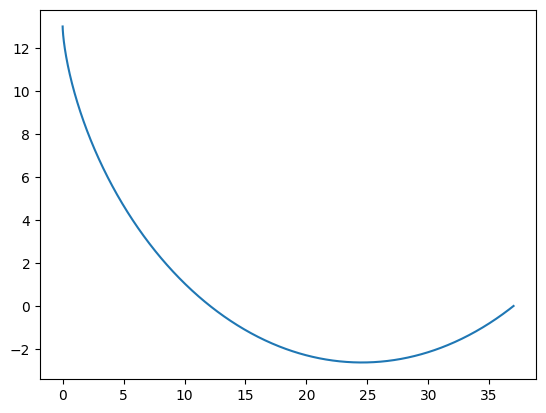

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)

r = HEIGHT / (1 - np.cos(theta))

ts = np.linspace(0, theta, 1000)
sol_xs = r * (ts - np.sin(ts))
sol_ys = HEIGHT - r * (1 - np.cos(ts))

ax.plot(sol_xs, sol_ys)
fig.canvas.draw()
plt.show(block=False)

**II метод**

In [4]:
NUM_POINTS = 50
dx = WIDTH / (NUM_POINTS - 1)
xs = np.linspace(0, WIDTH, NUM_POINTS)

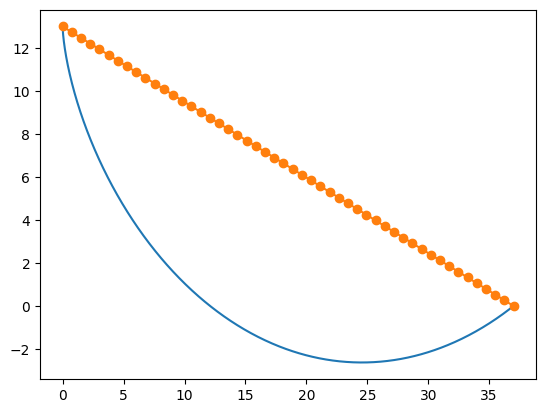

In [5]:
def draw(ys):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(sol_xs, sol_ys)
    (li,) = ax.plot(xs, ys, marker="o")


# инициализируем горку прямой
ys = np.linspace(HEIGHT, 0, NUM_POINTS)
draw(ys)

In [6]:
from scipy.optimize import minimize

In [7]:
def get_time(ys):
    g = 9.81
    heights = ys[0] - ys
    vs = np.sqrt(2 * g * heights)
    vs_avg = (vs[:-1] + vs[1:]) / 2
    time = sum(np.sqrt((np.diff(ys)**2 + dx**2)) / vs_avg)
    
    return time

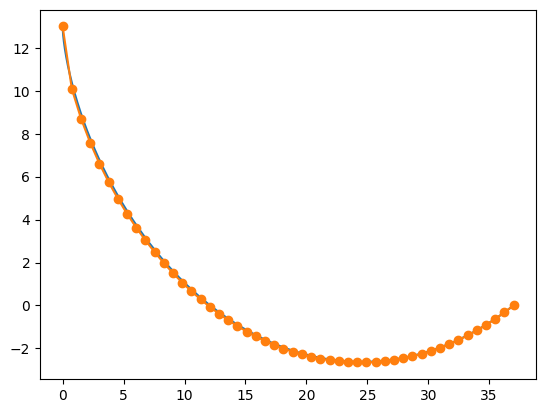

In [8]:
bounds = (
    [(HEIGHT, HEIGHT)]
    + [(-float("inf"), float("inf")) for _ in range(NUM_POINTS - 2)]
    + [(0, 0)]
)

# Run the optimization
y0 = np.zeros(50)
result = minimize(get_time, y0, bounds= bounds)

draw(result.x)

In [9]:
get_time(ys), get_time(result.x)

(4.91119282308311, 3.5654726736889755)